<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-LinearSVC" data-toc-modified-id="Модель-LinearSVC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LinearSVC</a></span></li><li><span><a href="#Модель-DummyClassifier" data-toc-modified-id="Модель-DummyClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель DummyClassifier</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сравнение моделей</a></span><ul class="toc-item"><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
import spacy

from nltk.corpus import stopwords 

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Загрузка и изучение данных

In [3]:
df =  pd.read_csv('/datasets/toxic_comments.csv')
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
df.shape

(159571, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


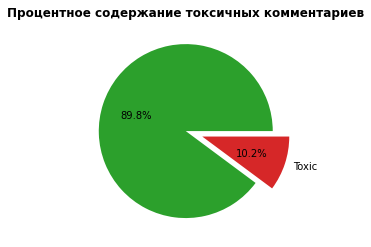

In [6]:
gr = df.groupby('toxic').count()
labels = ['','Toxic']
colors = ['tab:green', 'tab:red']
explode = (0, 0.2)
plt.pie(gr['text'], labels = labels, colors=colors, explode= explode, autopct='%.1f%%')
plt.title('Процентное содержание токсичных комментариев',fontweight='bold')
plt.show()

### Подготовка к обучению

Функция лемматизации

In [7]:
def lemmatize(text, lemmatizer):
    doc = lemmatizer(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
        
    return lemm_text

Функция очистки текста

In [8]:
def clear(text):
    cleaned = re.sub(r"[^a-zA-Z\' ]", ' ', text)
    return " ".join(cleaned.split())

Очистка текста

In [9]:
%%time
df['text'] = df['text'].apply(clear)

CPU times: user 2.07 s, sys: 46.4 ms, total: 2.12 s
Wall time: 2.13 s


Лемматизируем текст

In [10]:
%%time
sp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
df['lemma'] = df['text'].apply(lemmatize, lemmatizer=sp)

CPU times: user 14min 59s, sys: 872 ms, total: 15min
Wall time: 15min 1s


**Вывод:**
- Данные успешно загружены и изучены
- Пропусков нет
- Классы несбалансированы, что нужно учесть при обучении моделей
- Проведена лемматизация
- Данные готовы к обучению

## Обучение

In [11]:
# Проведем downsampling
#df_toxic = df[df['toxic'] == 1]
#df_not_toxic = df[df['toxic'] == 0]

#df_downsampled = pd.concat([df_toxic] + [df_not_toxic.sample(n=16225, random_state=12345)])
#df_downsampled['toxic'].value_counts()

Определение признаков

In [12]:
#df_downsampled = df_downsampled.dropna()
features = df['lemma']
target = df['toxic']

Разделение данных на обучающую и тестовую выборки

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25, 
                                                                            shuffle=True,
                                                                            random_state=12345)

In [14]:
features_train.shape, features_test.shape

((119678,), (39893,))

Рассчитаем для каждого слова TF-IDF

In [15]:
stop_words = set(stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stop_words) 
count_tf_idf.fit(features_train) 
tf_idf = count_tf_idf.transform(features_train)

print("Размер массива TF-IDF:", tf_idf.shape)

Размер массива TF-IDF: (119678, 132841)


### Модель RandomForestClassifier

In [16]:
comparison = pd.DataFrame(columns = ['model', 'f1'])

In [17]:
%%time
model_rfc = RandomForestClassifier(ccp_alpha=0.005,
                                   n_jobs=-1,
                                   class_weight='balanced')

parameters = {'max_depth' : [15, 30]}

model_rfc_cv = GridSearchCV(model_rfc, parameters, scoring = 'f1')
model_rfc_cv.fit(tf_idf, target_train)

comparison = comparison.append({'model' : 'RandomForestClassifier',
                     'f1' : f1_score(target_train, model_rfc_cv.predict(tf_idf))}, ignore_index=True)

model_rfc_cv.best_params_

CPU times: user 7min 2s, sys: 408 ms, total: 7min 3s
Wall time: 7min 3s


{'max_depth': 15}

### Модель LogisticRegression

In [18]:
%%time
model_lr = LogisticRegression(class_weight='balanced',
                           n_jobs=-1,
                           random_state=42)

parameters = {'solver': ['liblinear','newton-cg', 'lbfgs']}


model_lr_cv = GridSearchCV(model_lr, parameters, scoring = 'f1')
model_lr_cv.fit(tf_idf, target_train)

comparison = comparison.append({'model' : 'LogisticRegression',
                     'f1' : f1_score(target_train, model_lr_cv.predict(tf_idf))}, ignore_index=True)

model_lr_cv.best_params_

CPU times: user 3min 33s, sys: 3min 42s, total: 7min 15s
Wall time: 7min 15s


{'solver': 'lbfgs'}

### Модель LinearSVC

In [19]:
%%time
model_svc = LinearSVC(random_state=42, 
                      class_weight='balanced', 
                      max_iter=50)

parameters = {'multi_class': ['ovr', 'crammer_singer'],
              'loss' : ['hinge','squared_hinge'],
              'C' : [1e-8, 1e-4, 1e-2, 1],
              'penalty' : ['l1', 'l2']}

model_svc_cv = GridSearchCV(model_svc, parameters, scoring = 'f1')
model_svc_cv.fit(tf_idf, target_train)

comparison = comparison.append({'model' : 'LinearSVC',
                     'f1' : f1_score(target_train, model_svc_cv.predict(tf_idf))}, ignore_index=True)

model_svc_cv.best_params_

CPU times: user 6min, sys: 1.93 s, total: 6min 1s
Wall time: 6min 2s


{'C': 1, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l2'}

### Модель DummyClassifier

Для проверки модели на адекватность, вычислим F1 для дамми модели.

In [20]:
dummy = DummyClassifier(strategy="constant", constant=1)
dummy.fit(tf_idf, target_train)

comparison = comparison.append({'model' : 'DummyClassifier',
                     'f1' : f1_score(target_train, dummy.predict(tf_idf))}, ignore_index=True)

### Сравнение моделей

In [21]:
comparison

,model,f1
0,RandomForestClassifier,0.327789
1,LogisticRegression,0.833250
2,LinearSVC,0.913760
3,DummyClassifier,0.184166


#### Тестирование лучшей модели

Лучшие показатели у модели LinearSVC

In [22]:
tf_idf_test = count_tf_idf.transform(features_test) 
print("Размер массива TF-IDF:", tf_idf_test.shape)

Размер массива TF-IDF: (39893, 132841)


In [23]:
predicted_test = model_svc_cv.best_estimator_.predict(tf_idf_test)
print(f"F1 score LinearSVC: {f1_score(target_test, predicted_test)}")

F1 score LinearSVC: 0.7658752697943882


## Выводы

- Текст лемматизирован с использованием библиотеки spacy 
- Обучены модели Random Forrest, Logistic Regression и LinearSVC
- Гиперпараметры подобраны с помощью Grid Search
- Наилучшие резуьтаты показала модель LinearSVC
- На тестовой выборке результат выбранной модели получился F1 ~ 0.77